In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus    
import os
tennis_data = pd.read_csv('C:\\tennis.csv')
tennis_data

,Unnamed: 0,outlook,temp,humidity,windy,play
0,0,sunny,hot,high,False,no
1,1,sunny,hot,high,True,no
2,2,overcast,hot,high,False,yes
3,3,rainy,mild,high,False,yes
4,4,rainy,cool,normal,False,yes
5,cool,rainy,cool,normal,True,no
6,6,overcast,cool,normal,True,yes
7,7,sunny,mild,high,False,no
8,8,sunny,cool,normal,False,yes
9,9,rainy,mild,normal,False,yes


In [3]:
tennis_data.outlook = tennis_data.outlook.replace('sunny',0)
tennis_data.outlook = tennis_data.outlook.replace('overcast', 1)
tennis_data.outlook = tennis_data.outlook.replace('rainy',2)

tennis_data.temp = tennis_data.temp.replace('hot',3)
tennis_data.temp = tennis_data.temp.replace('mild',4)
tennis_data.temp = tennis_data.temp.replace('cool',5)

tennis_data.humidity = tennis_data.humidity.replace('high',6)
tennis_data.humidity = tennis_data.humidity.replace('normal',7)

tennis_data.windy = tennis_data.windy.replace(False,8)
tennis_data.windy = tennis_data.windy.replace(True,9)

tennis_data.play = tennis_data.play.replace('no',10)
tennis_data.play = tennis_data.play.replace('yes',11)

tennis_data

,Unnamed: 0,outlook,temp,humidity,windy,play
0,0,0,3,6,8,10
1,1,0,3,6,9,10
2,2,1,3,6,8,11
3,3,2,4,6,8,11
4,4,2,5,7,8,11
5,5,2,5,7,9,10
6,6,1,5,7,9,11
7,7,0,4,6,8,10
8,8,0,5,7,8,11
9,9,2,4,7,8,11


In [8]:
X = np.array(pd.DataFrame(tennis_data, columns=['outlook','temp', 'humidity', 'windy']))
y = np.array(pd.DataFrame(tennis_data, columns=['play']))
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [12]:
X_train

array([[2, 4, 6, 9],
       [2, 5, 7, 8],
       [0, 4, 6, 8],
       [2, 4, 6, 8],
       [0, 5, 7, 8],
       [1, 5, 7, 9],
       [1, 3, 7, 8],
       [0, 3, 6, 9],
       [1, 3, 6, 8],
       [2, 5, 7, 9]], dtype=int64)

In [13]:
X_test

array([[1, 4, 6, 9],
       [0, 3, 6, 8],
       [2, 4, 7, 8],
       [0, 4, 7, 9]], dtype=int64)

In [14]:
y_train

array([[10],
       [11],
       [10],
       [11],
       [11],
       [11],
       [11],
       [10],
       [11],
       [10]], dtype=int64)

In [15]:
y_test

array([[11],
       [10],
       [11],
       [11]], dtype=int64)

In [9]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

In [10]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]
target_name = np.array(['Play No', 'Play Yes'])

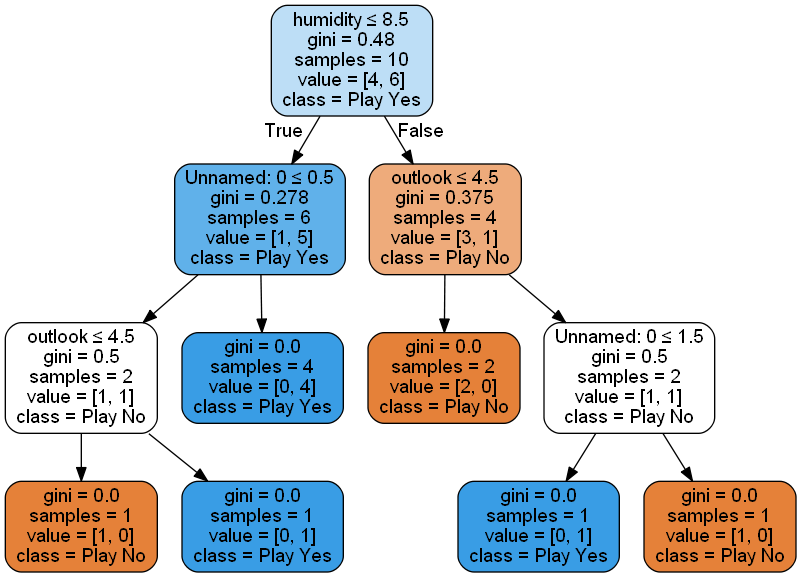

In [11]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())